In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the approx algorithms dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Use For Inapprox?',
    'Parallel?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)',
    'Quantum?'
]
approximation_algorithms = pd.read_csv('approx_algos.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001 or 0
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0']
# drop Relevant? == 0
approximation_algorithms = approximation_algorithms[approximation_algorithms['Use For Inapprox?'] != 0]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Use For Inapprox?'] != '0']

# filter out parallel algorithms
approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != '1']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != '1']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != 1]






approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
# approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

# drop empty family names
approximation_algorithms = approximation_algorithms[approximation_algorithms['Family Name'].notnull()]

for col in ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']:
    # Extract numeric (float) from string
    approximation_algorithms[col] = approximation_algorithms[col].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
    approximation_algorithms[col] = approximation_algorithms[col].replace(0, 99999)
    

approximation_algorithms.sort_values(by=['Family Name', 'Year', 'Variation'], inplace=True)

approximation_algorithms

,Family Name,Looked at?,Use For Inapprox?,Variation,Algorithm Name,Year,Time Complexity Class,Approximation Factor Class (Mult),Approximation Factor Class (Add),Approximation Type (additive/multiplicative),Parametrized Approximation?,Type of PTAS (if PTAS),Parallel?,Quantum?
1062,Boolean 2-Satisfiability,1,1,Max-2SAT,"Poljak, Turzik",1982.0,6.00,3.000,99999.0,multiplicative,no,NaN,0,0.0
1063,Boolean 2-Satisfiability,1,1,Max Weighted 2SAT,Yannakakis,1994.0,7.00,2.333,99999.0,multiplicative,no,NaN,0,0.0
1064,Boolean 2-Satisfiability,1,1,Max Weighted 2SAT,"Goemans, Williamson [Section 3]",1994.0,7.00,2.333,99999.0,multiplicative,no,NaN,0,0.0
1065,Boolean 2-Satisfiability,1,1,Max Weighted 2SAT,"Goemans, Williamson",1995.0,6.01,2.139,99999.0,multiplicative,no,NaN,0,0.0
1066,Boolean 2-Satisfiability,1,1,Max Weighted 2SAT,"Feige, Goemans",1995.0,7.00,2.074,99999.0,multiplicative,no,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,The Vertex Cover Problem,1,1,"The Vertex Cover Problem, General (Approximate)",Halperin,2002.0,7.00,2.990,99999.0,multiplicative,no,NaN,0,0.0
759,The Vertex Cover Problem,1,1,"The Vertex Cover Problem, General (Approximate)",Karakostas,2004.0,7.00,2.990,99999.0,multiplicative,no,NaN,0,0.0
919,Wiener Index,1,1,Minimum Wiener Connector problem,NaN,2008.0,5.50,2.000,99999.0,multiplicative,yes,FPTAS,0,0.0
918,Wiener Index,1,1,Minimum Wiener Connector problem,Ruchansky,2015.0,5.01,4.000,99999.0,multiplicative,no,NaN,0,0.0


In [3]:
# Load the approx lower bounds dataset
columns = [
    'Problem Family', 
    'Problem Variation',
    'Relevant?', 
    'Run Time Lower Bound',
    'Exact Inapprox. Ratio',
    'Parameter',
    '"Rounded" Inapprox Ratio',
    'Approximation Factor Class (Mult)',
    'Year'
]
approximation_lower_bounds = pd.read_csv('inapprox.csv', usecols=columns)

# Clean and prepare the data

# drop Relevant? == 0
approximation_lower_bounds = approximation_lower_bounds[approximation_lower_bounds['Relevant?'] != 0]
approximation_lower_bounds = approximation_lower_bounds[approximation_lower_bounds['Relevant?'] != '0']






#approximation_lower_bounds['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
#approximation_lower_bounds.dropna(subset=['Year'], inplace=True)

# drop empty family names
approximation_lower_bounds = approximation_lower_bounds[approximation_lower_bounds['Problem Family'].notnull()]
    

approximation_lower_bounds.sort_values(by=['Problem Family', 'Year', 'Problem Variation'], inplace=True)

approximation_lower_bounds

,Problem Family,Problem Variation,Relevant?,Run Time Lower Bound,Exact Inapprox. Ratio,Parameter,"""Rounded"" Inapprox Ratio",Approximation Factor Class (Mult),Year
29,Boolean 2-Satisfiability,Max-2SAT,1,polynomial,PTAS,NaN,NaN,2.000,1991
32,Boolean 2-Satisfiability,Max-2SAT,1,polynomial,PTAS,NaN,NaN,2.000,1991
30,Boolean 2-Satisfiability,Max-2SAT,1,polynomial,$1.013$,NaN,$1.013$,2.013,1995
33,Boolean 2-Satisfiability,Max-2SAT,1,polynomial,$\frac{22}{21}-\epsilon$,any epsilon>0,$1.047619$,2.047,2001
34,Boolean 2-Satisfiability,Max-2SAT,1,polynomial,$\approx\frac{1}{0.943943}-\epsilon$,any epsilon>0,$1.059386$,2.059,2007
...,...,...,...,...,...,...,...,...,...
86,The Vertex Cover Problem,"The Vertex Cover Problem, General (Approximate)",1,polynomial,$2-\epsilon$,any epsilon>0,$2$,2.990,2007
87,The Vertex Cover Problem,"The Vertex Cover Problem, Sparse (Approximate)",1,polynomial,$2 - (2+o(1))\frac{\log\log d}{\log d}$,d - maximum degree,$2$,2.990,2009
85,The Vertex Cover Problem,"The Vertex Cover Problem, General (Approximate)",1,polynomial,$\tfrac{3}{2}$,NaN,$\frac{3}{2}$,2.500,2015
84,The Vertex Cover Problem,"The Vertex Cover Problem, General (Approximate)",1,polynomial,$\sqrt2-\epsilon$,any epsilon>0,$1.414214$,2.414,2017


In [4]:
def fill_best_algo(df, column="Approximation Factor Class (Mult)"):
    best = []
    last_best = 99999
    for index, row in df.iterrows():
        if row[column] < last_best:
            best.append(True)
            last_best = row[column]
        else:
            best.append(False)

    return best
    
def fill_best_lb(df, column="Approximation Factor Class (Mult)"):
    best = []
    last_best = 0
    for index, row in df.iterrows():
        if row[column] > last_best:
            best.append(True)
            last_best = row[column]
        else:
            best.append(False)

    return best


def plot_family_all(family):
    
    df1 = approximation_algorithms.copy()
    df2 = approximation_lower_bounds.copy()

    df1 = df1[df1['Family Name'] == family]
    df2 = df2[df2['Problem Family'] == family]


    # Reduce opcity of point that are not the best
    
    df1['Best'] = fill_best_algo(df1)
    df2['Best'] = fill_best_lb(df2)

    plt.figure(figsize=(6, 6))
    # hide in legend
    plt.scatter(df1['Year'], df1['Approximation Factor Class (Mult)']+1, color='#DD444422')
    plt.scatter(df2['Year'], df2['Approximation Factor Class (Mult)']+1, color='#5975A422')

    if len(df1) > 0:
        best_approximate = df1[df1['Best']]
        last_row = best_approximate.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_approximate = pd.concat([best_approximate, last_row], ignore_index=True)
        plt.scatter(best_approximate['Year'], best_approximate['Approximation Factor Class (Mult)']+1, label='approx algo', color='#DD4444')
        plt.step(best_approximate['Year'], best_approximate['Approximation Factor Class (Mult)']+1, where='post', color='#DD4444')

    if len(df2) > 0:
        best_lb = df2[df2['Best']]
        last_row2 = best_lb.iloc[-1:].copy()
        last_row2['Year'] = 2024
        best_lb = pd.concat([best_lb, last_row2], ignore_index=True)
        plt.scatter(best_lb['Year'], best_lb['Approximation Factor Class (Mult)']+1, label='lower bound', color='#5975A4')
        plt.step(best_lb['Year'], best_lb['Approximation Factor Class (Mult)']+1, where='post', color='#5975A4')
        
    current_best_lb = best_lb['Approximation Factor Class (Mult)'].iloc[-1]
    current_best_approx = best_approximate['Approximation Factor Class (Mult)'].iloc[-1]
    if current_best_lb == current_best_approx:
        matching_year = min(best_lb['Year'].iloc[-2], best_approximate['Year'].iloc[-1])
        plt.scatter([2024], [current_best_lb+1], color='green')
        plt.step([matching_year, 2024], [current_best_lb+1]*2, where='post', color='green')
        #plt.figtext(0.8, (current_best_lb+1.3)/12, str(best_lb['Exact Inapprox. Ratio'].iloc[-1]), ha='center', fontsize=10)
        


    plt.yticks(np.arange(1, 12, 1), ['1', '1+o(1)', '1+eps', '2', 'constant, > 2', 'loglog(n)', 'log(n)', 'polylog(n)', 'sqrt(n)', 'n', 'omega(n)'])


    plt.xlabel('Year')
    plt.ylabel('Approx Class')
    plt.legend()
    plt.title(family)
    
    plt.savefig('figures/prog-all/'+family+'.png', bbox_inches='tight')
    
    plt.show()



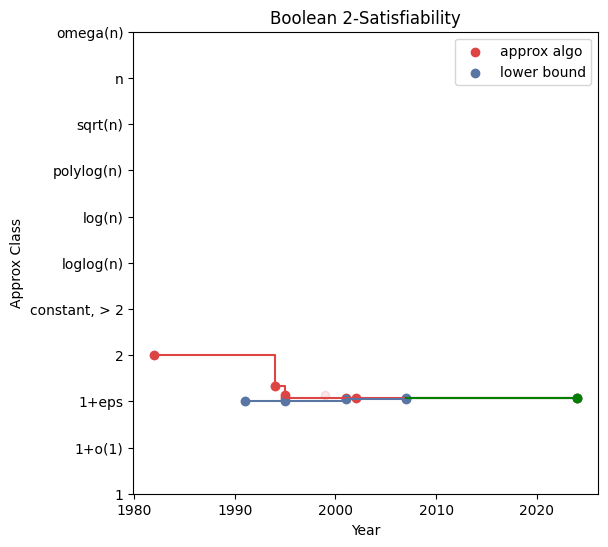

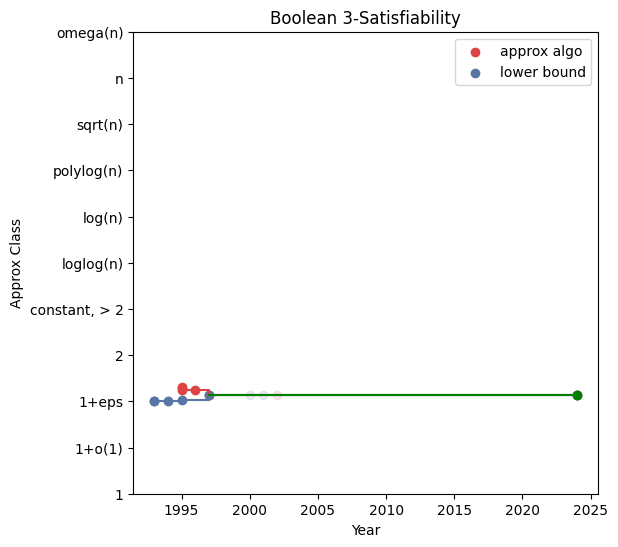

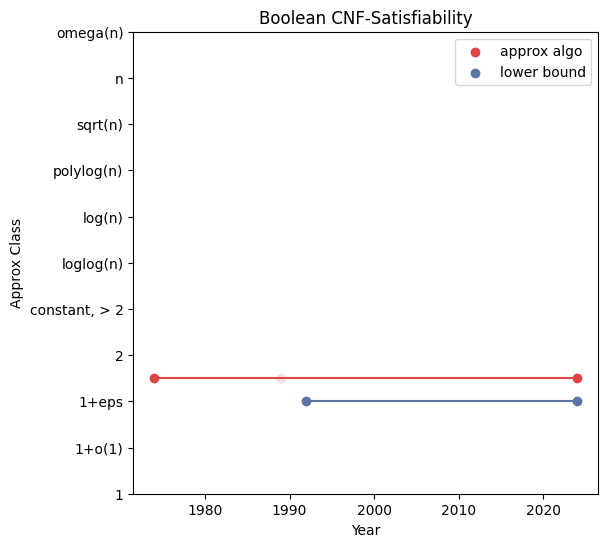

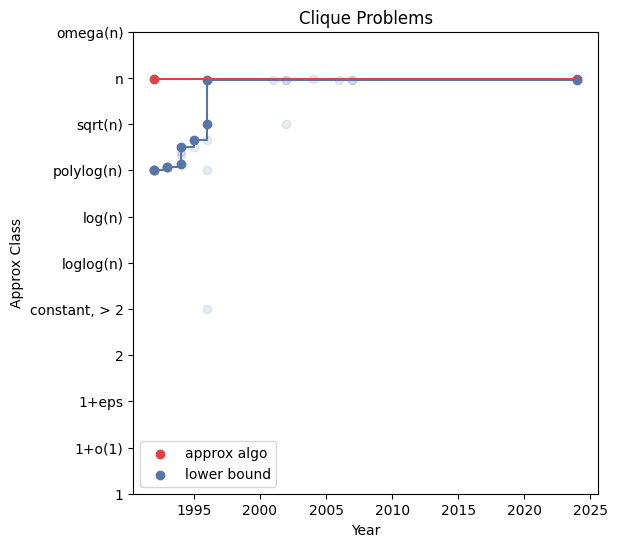

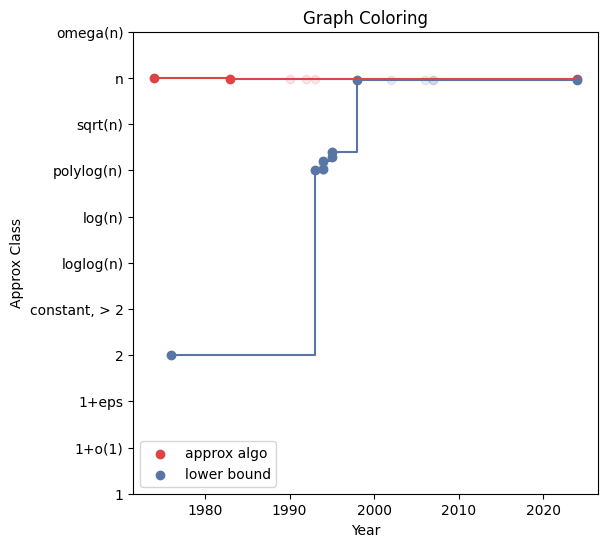

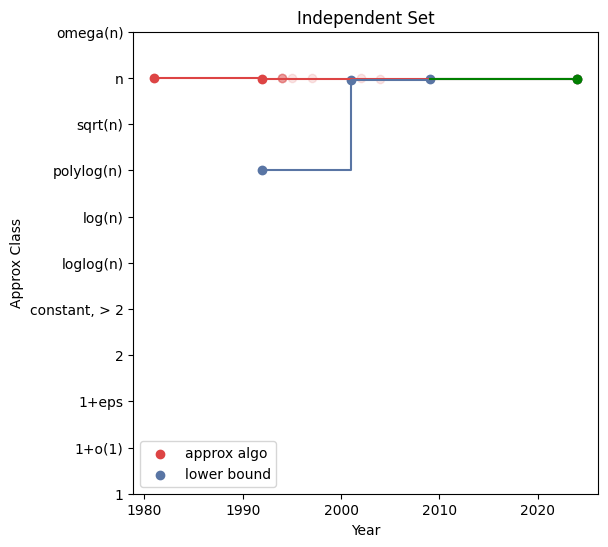

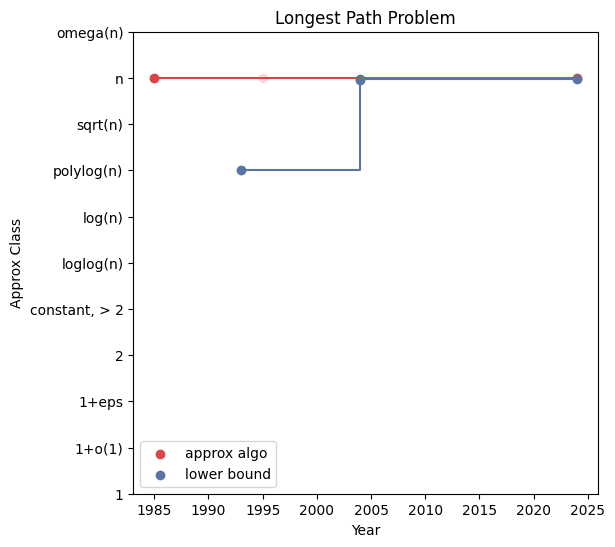

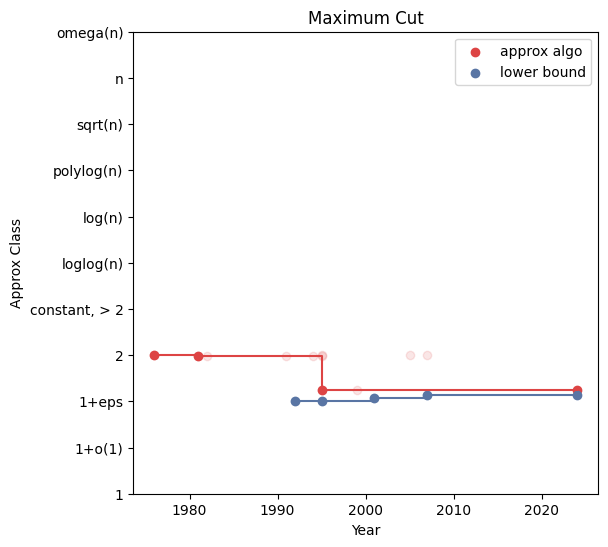

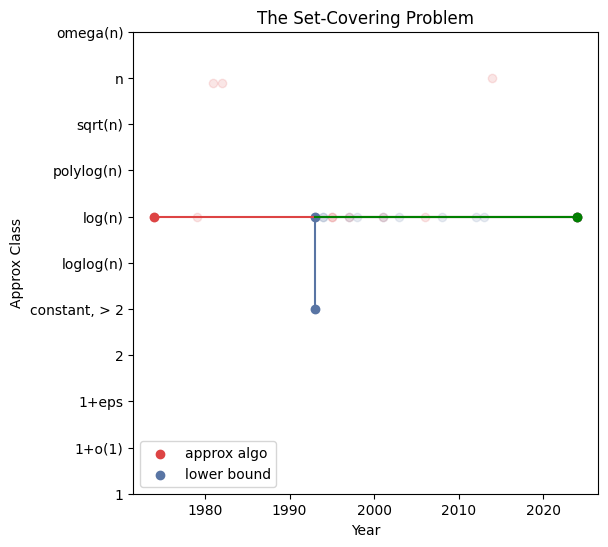

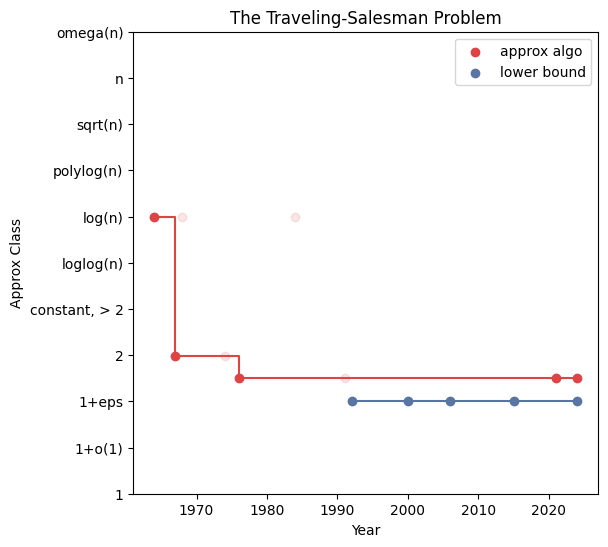

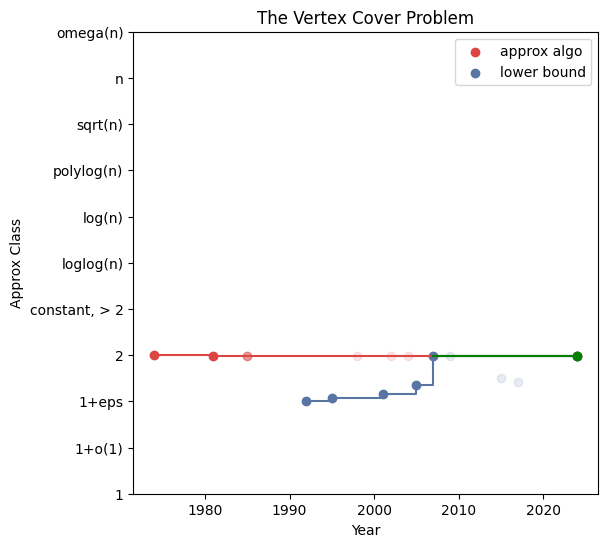

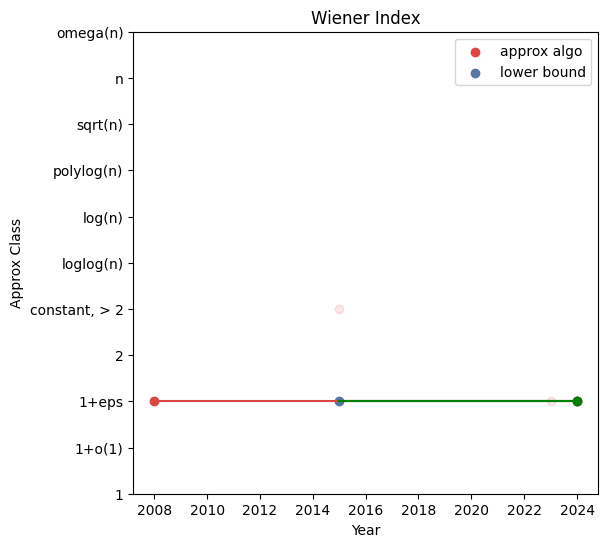

In [5]:
for family in approximation_algorithms['Family Name'].unique():
    plot_family_all(family)

In [6]:
def plot_family_cst(family):
    
    df1 = approximation_algorithms.copy()
    df2 = approximation_lower_bounds.copy()

    df1 = df1[df1['Family Name'] == family]
    df1 = df1[df1['Approximation Factor Class (Mult)'] <= 4.5]
    df2 = df2[df2['Problem Family'] == family]
    df2 = df2[df2['Approximation Factor Class (Mult)'] <= 4.5]
    
    if df1.size > 0:
    
        df1['Best'] = fill_best_algo(df1)
        df2['Best'] = fill_best_lb(df2)

        plt.figure(figsize=(6, 6))
        plt.scatter(df1['Year'], df1['Approximation Factor Class (Mult)']+1, color='#DD444422')
        plt.scatter(df2['Year'], df2['Approximation Factor Class (Mult)']+1, color='#5975A422')

        if len(df1) > 0:
            best_approximate = df1[df1['Best']]
            last_row = best_approximate.iloc[-1:].copy()
            last_row['Year'] = 2024
            best_approximate = pd.concat([best_approximate, last_row], ignore_index=True)
            plt.scatter(best_approximate['Year'], best_approximate['Approximation Factor Class (Mult)']+1, label='approx algo', color='#DD4444')
            plt.step(best_approximate['Year'], best_approximate['Approximation Factor Class (Mult)']+1, where='post', color='#DD4444')

        if len(df2) > 0:
            best_lb = df2[df2['Best']]
            last_row2 = best_lb.iloc[-1:].copy()
            last_row2['Year'] = 2024
            best_lb = pd.concat([best_lb, last_row2], ignore_index=True)
            plt.scatter(best_lb['Year'], best_lb['Approximation Factor Class (Mult)']+1, label='lower bound', color='#5975A4')
            plt.step(best_lb['Year'], best_lb['Approximation Factor Class (Mult)']+1, where='post', color='#5975A4')
        

        current_best_lb = best_lb['Approximation Factor Class (Mult)'].iloc[-1]
        current_best_approx = best_approximate['Approximation Factor Class (Mult)'].iloc[-1]
        if current_best_lb == current_best_approx:
            matching_year = min(best_lb['Year'].iloc[-2], best_approximate['Year'].iloc[-1])
            plt.scatter([2024], [current_best_lb+1], color='green')
            plt.step([matching_year, 2024], [current_best_lb+1]*2, where='post', color='green')

        plt.yticks(np.arange(1, 6, 1), ['1', '1+o(1)', '1+eps', '2', 'constant, > 2'])


        plt.xlabel('Year')
        plt.ylabel('Approx Class')
        plt.legend()
        plt.title(family + " (cst factor)")
        
        plt.savefig('figures/prog-cst/'+family+'.png', bbox_inches='tight')
        
        plt.show()


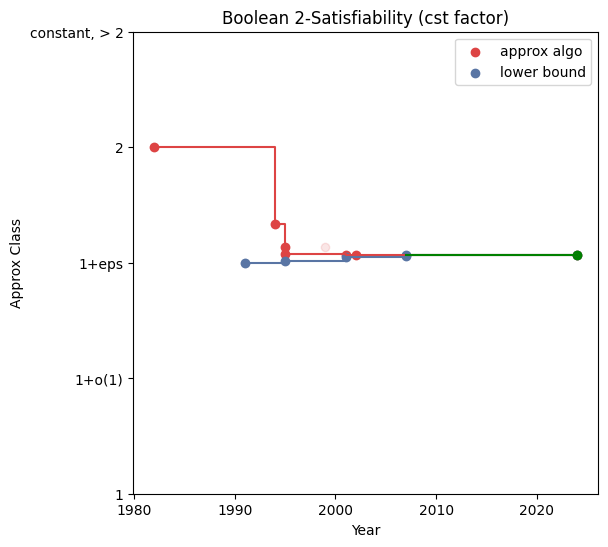

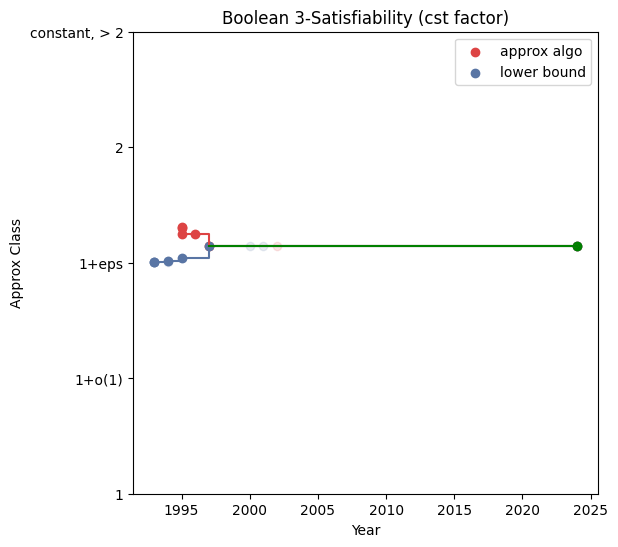

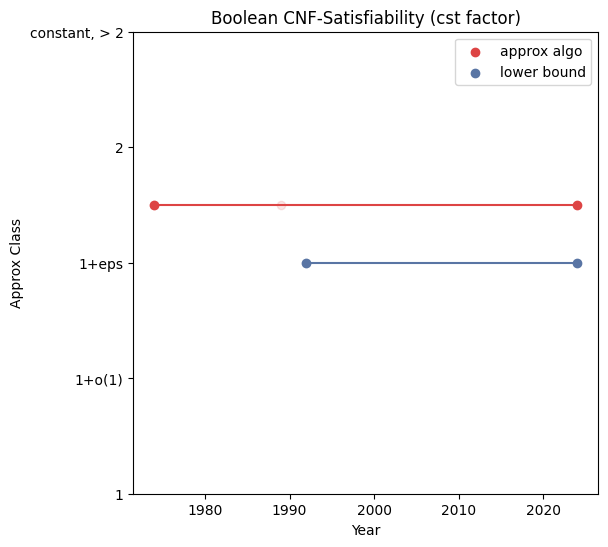

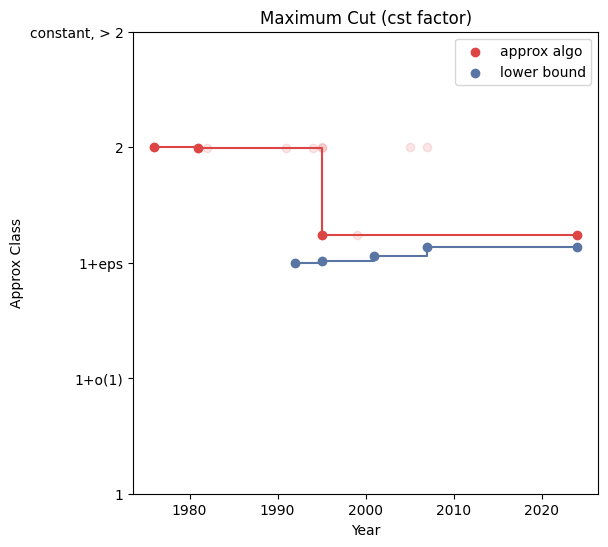

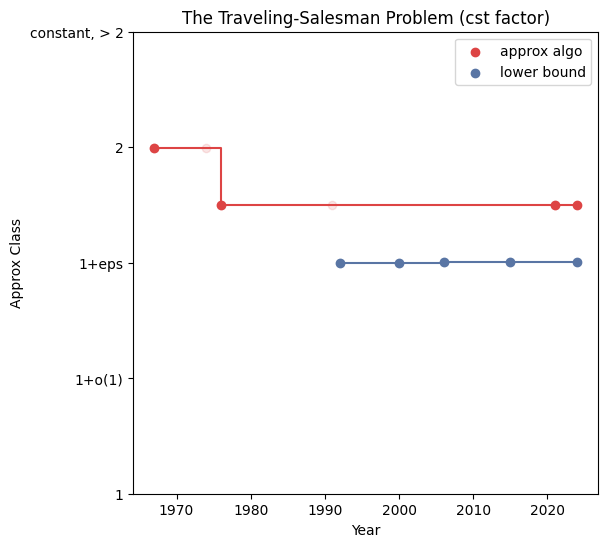

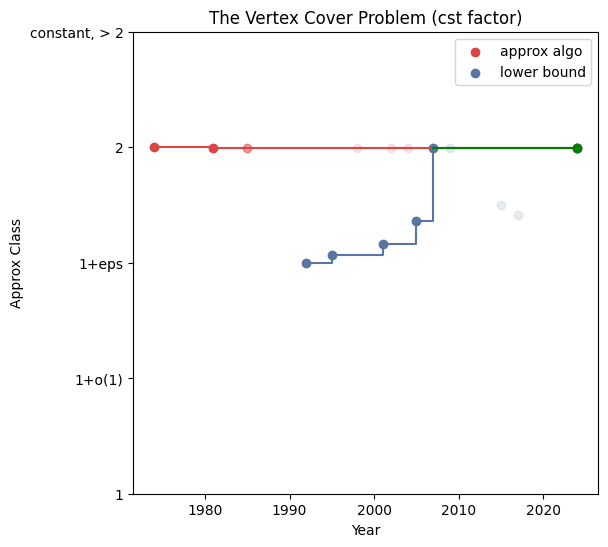

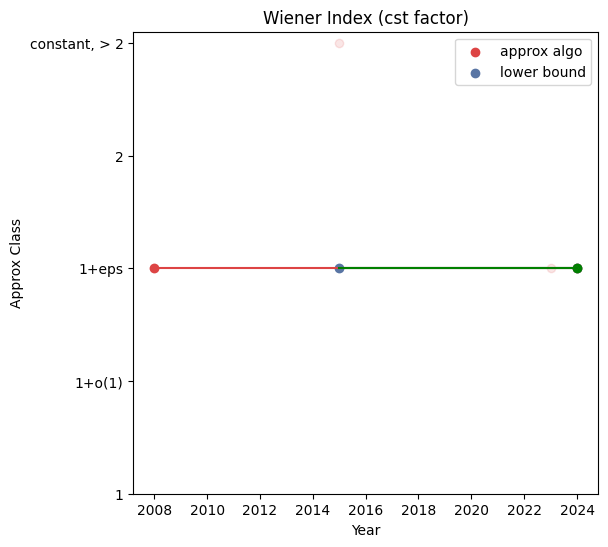

In [7]:
for family in approximation_algorithms['Family Name'].unique():
    plot_family_cst(family)

In [8]:
#approximation_algorithms['Approximation Factor Class (Mult)'].tolist()

In [51]:
def plot_family_runtime_vs_approx(family):
    
    df1 = approximation_algorithms.copy()
    df2 = approximation_lower_bounds.copy()

    df1 = df1[df1['Family Name'] == family]
    df2 = df2[df2['Problem Family'] == family]

    
    df1.sort_values(by=['Approximation Factor Class (Mult)', 'Time Complexity Class'], ascending=[True, False], inplace=True)
    df2.sort_values(by=['Approximation Factor Class (Mult)'], inplace=True)
    
    trivial_algo = 9
    if family == 'The Traveling-Salesman Problem':
        trivial_algo = 10
    
    algos_x = df1['Approximation Factor Class (Mult)'].tolist()+[trivial_algo]
    algos_y = df1['Time Complexity Class'].tolist()+[3]
    
    inapprox_x = df2['Approximation Factor Class (Mult)'].tolist()
    inapprox_y = [7]*df2.shape[0]
    
    for i in range(len(algos_x)):
        algos_x[i] += 1
    
    for i in range(len(inapprox_x)):
        inapprox_x[i] += 1

    # Reduce opcity of point that are not the best
    
    best_algos_x = []
    best_algos_y = []
    best_algo_runtime = 999
    for i in range(len(algos_x)):
        if algos_y[i] < best_algo_runtime:
            if len(best_algos_x) > 0 and algos_x[i] == best_algos_x[-1]:
                best_algos_y[-1] = algos_y[i]
            else:
                best_algos_x.append(algos_x[i])
                best_algos_y.append(algos_y[i])
            best_algo_runtime = algos_y[i]
    
    best_inapprox_x = []
    best_inapprox_y = []
    best_inapprox_runtime = 999
    for i in range(len(inapprox_x)-1, -1, -1):
        if inapprox_y[i] < best_inapprox_runtime:
            if len(best_inapprox_x) > 0 and inapprox_x[i] == best_inapprox_x[-1]:
                best_inapprox_x[-1] = inapprox_x[i]
            else:
                best_inapprox_x.insert(0, inapprox_x[i])
                best_inapprox_y.insert(0, inapprox_y[i])
            best_inapprox_runtime = inapprox_y[i]
    
    #df1['Best'] = fill_best_algo(df1)
    #df2['Best'] = fill_best_lb(df2)

    plt.figure(figsize=(9, 6))
    # hide in legend
    plt.scatter(algos_x, algos_y, color='#DD444412')
    plt.scatter(inapprox_x, inapprox_y, color='#5975A412')
    
    plt.scatter(best_algos_x, best_algos_y, label='approx algo', color='#DD4444')
    plt.scatter(best_inapprox_x, best_inapprox_y, label='inapprox', color='#5975A4')
    plt.scatter([1], [9], color='#9B5D74')
    
    best_algos_x = [1]+best_algos_x+[11.5]
    best_algos_y = [9]+best_algos_y+best_algos_y[-1:]
    
    best_inapprox_x = [1]+best_inapprox_x+[11.5]
    best_inapprox_y = [9]+best_inapprox_y+[1]#best_inapprox_y[0:1]+best_inapprox_y+[1]
    
    plt.step(best_algos_x, best_algos_y, where='post', color='#DD4444')
    plt.step(best_inapprox_x, best_inapprox_y, where='pre', color='#5975A4')
    
    plt.fill_between(best_algos_x, best_algos_y, 9.5, step='post', facecolor='#DD444450')
    plt.fill_between(best_inapprox_x, 1, best_inapprox_y, step='pre', facecolor='#5975A450')
        


    plt.xticks(np.arange(1, 12, 1), ['$1$', '$1+o(1)$', '$1+\epsilon$', '$2$', '$C_{>2}$', '$\log\log(n)$', '$\log(n)$', '$poly\log(n)$', '$\sqrt{n}$', '$n$', '$\omega(n)$'])
    plt.yticks(np.arange(1, 10, 1), ['Constant', 'Polylogarithmic', 'Linear', 'Quasilinear', 'Quadratic', 'Cubic', 'Polynomial ($n^{O(1)}$)', 'Quasipolynomial', 'Exponential'])


    plt.xlabel('Approx Class')
    plt.ylabel('Time Complexity')
    plt.legend()
    plt.title(family)
    
    plt.savefig('figures/time-vs-approx/'+family+'.png', bbox_inches='tight')
    
    plt.show()



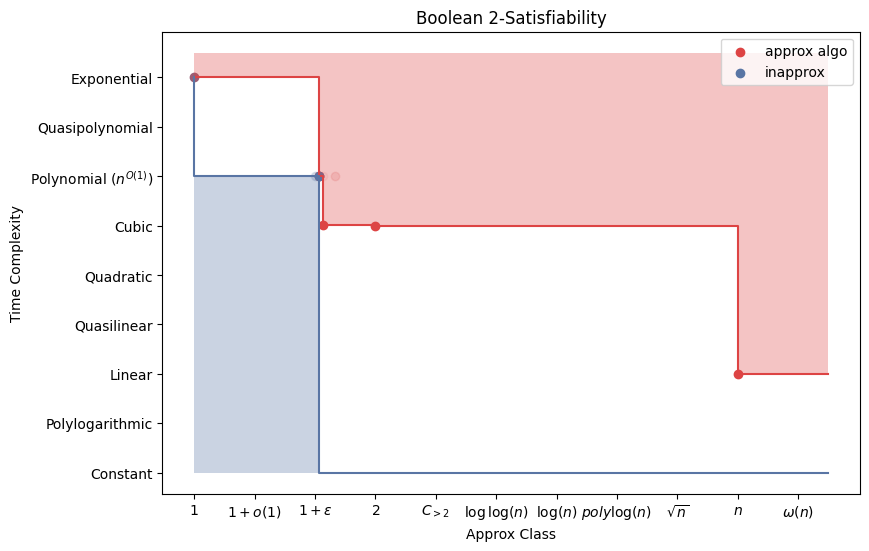

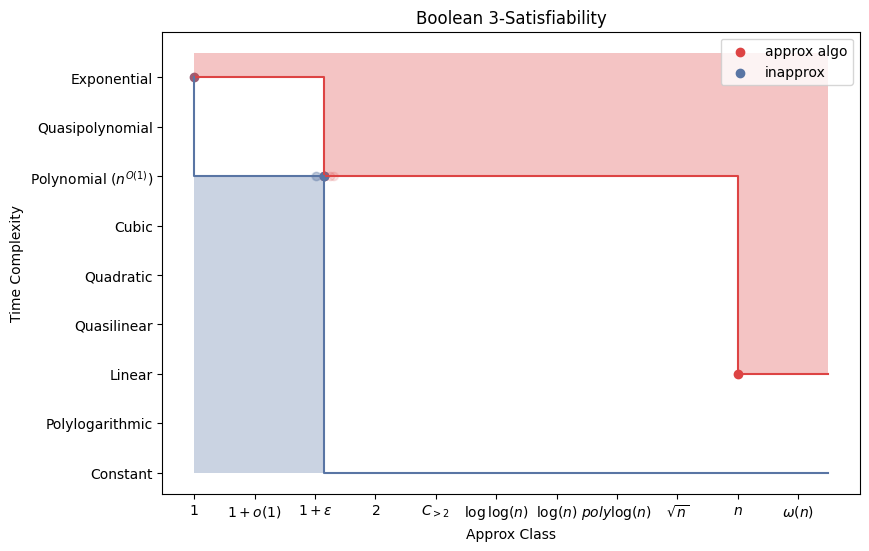

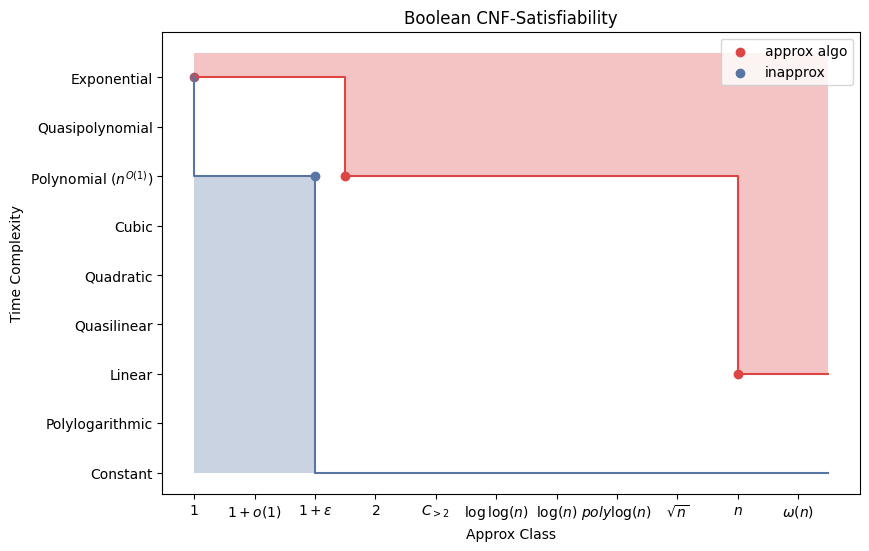

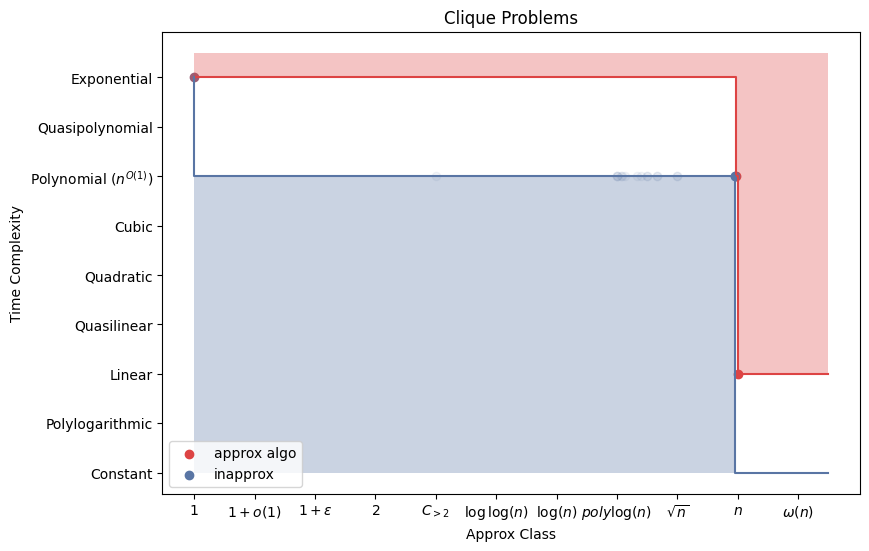

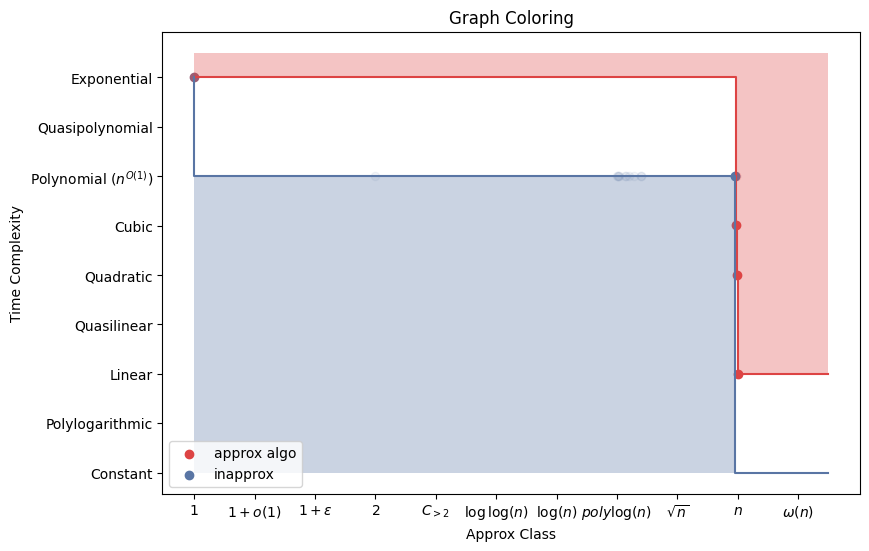

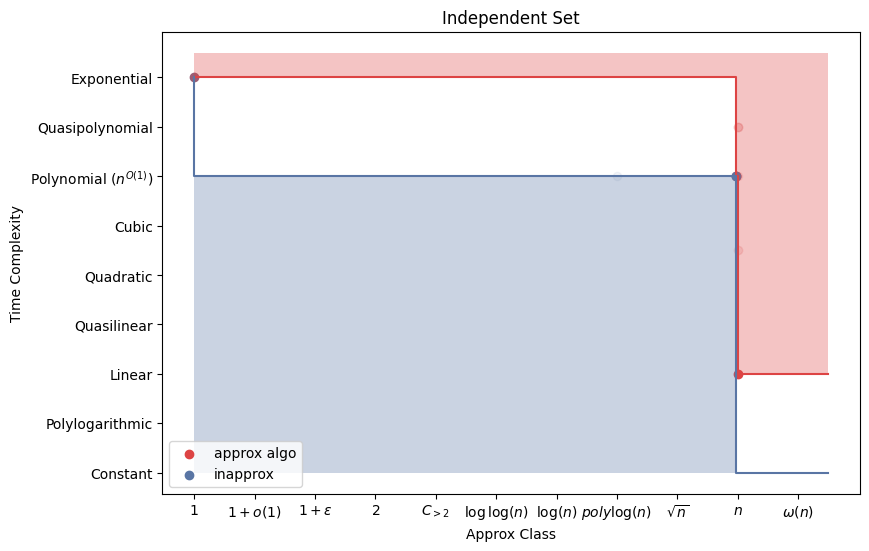

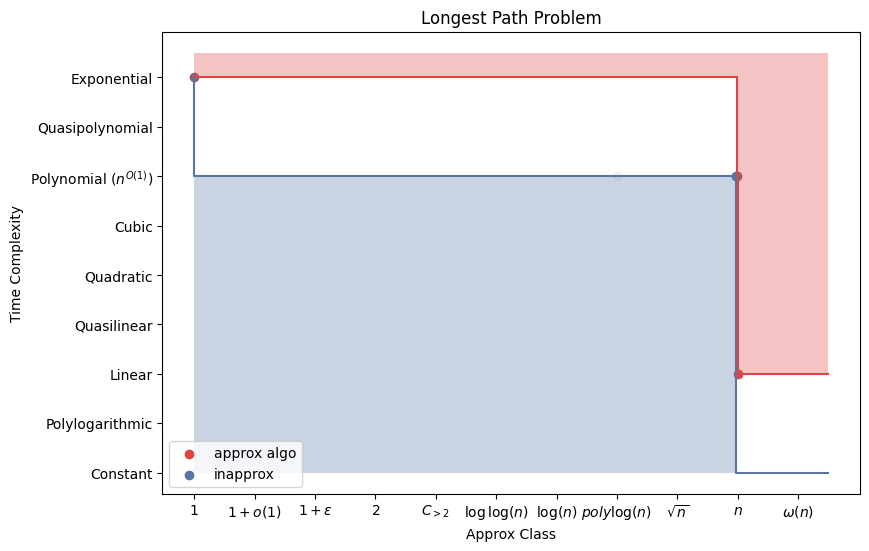

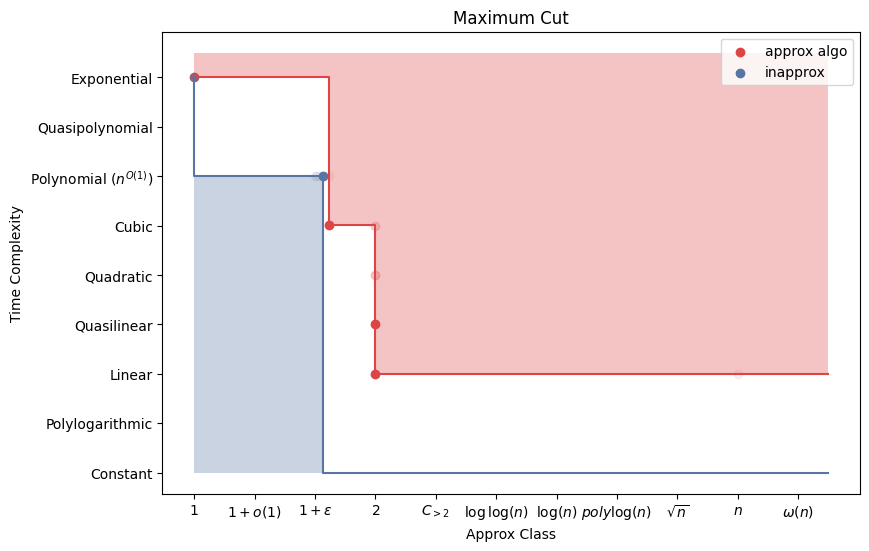

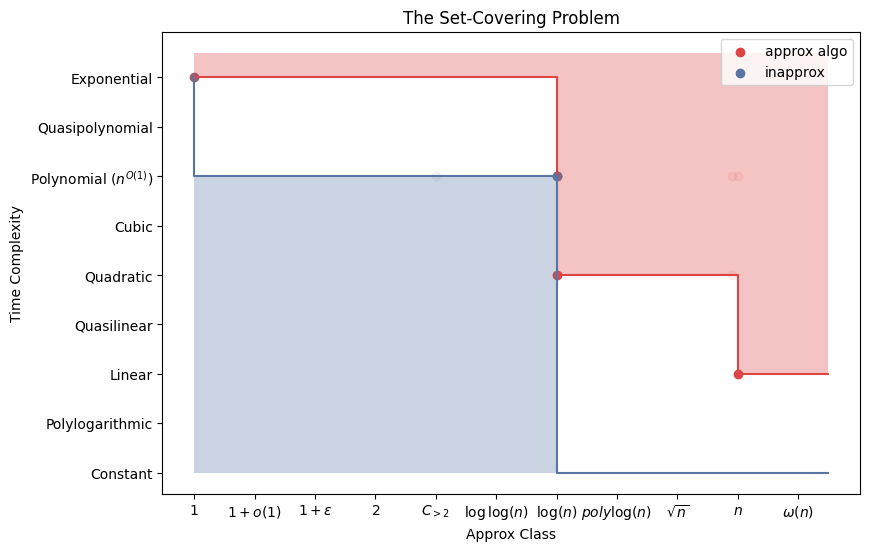

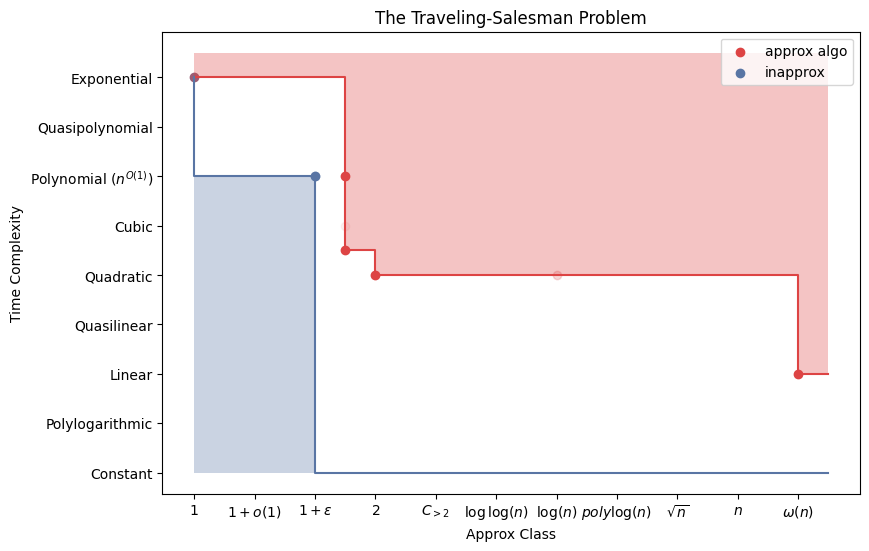

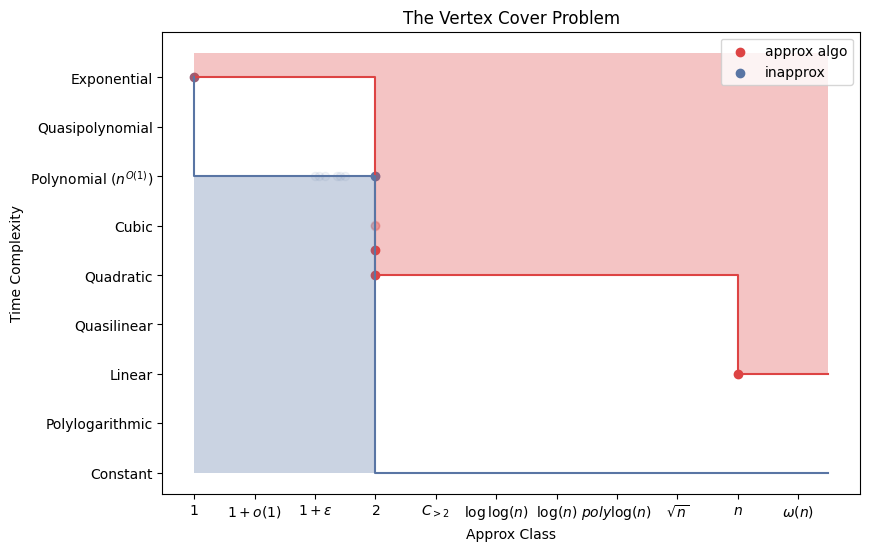

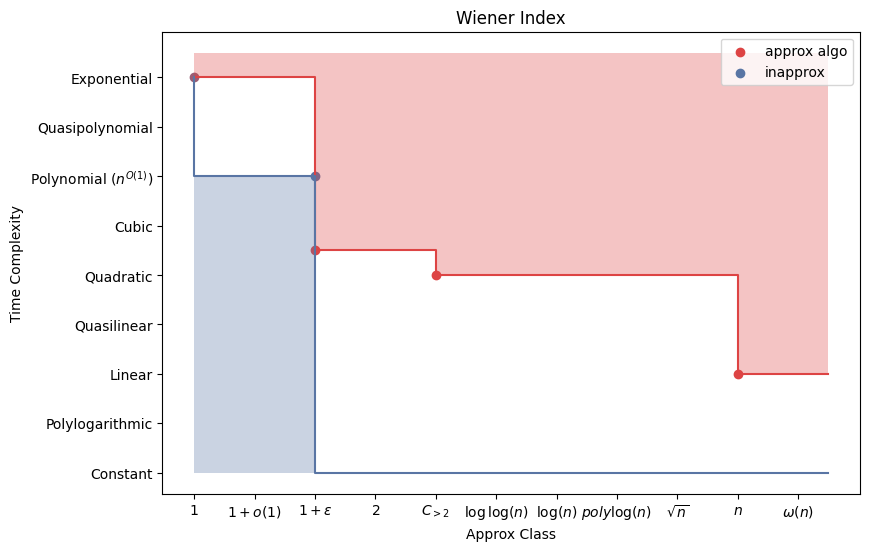

In [52]:
for family in approximation_algorithms['Family Name'].unique():
    plot_family_runtime_vs_approx(family)